### Fit and plot a 4-parameter logistic (4PL) ELISA standard curve.

This notebook:

1. Reads an Excel file with ELISA data.
2. Separates standards (known concentrations) from unknown samples.
3. Fits a 4-parameter logistic (4PL) model to the standards.
4. Computes a prediction confidence band for the fitted curve.
5. Estimates concentrations for the unknown samples from their OD values.
6. Produces a plot similar to the Prism output:
   - Black filled circles for standards.
   - Green open circles for measured samples.
   - Solid line for the fitted curve.
   - Dashed lines for the 95% prediction band.

- Loading libraries

In [1]:
import pandas as pd
from auxiliar_functions import AuxiliarFunctions

- Reading data and processing information

In [2]:
excel_path = "Elisa 4 18.19.17.xlsx"
df = pd.read_excel(excel_path)

- Separate standards and samples by presence/absence of concentration

In [3]:
standards = df[df["Concentration"].notna()].copy()
samples = df[df["Concentration"].isna()].copy()

x_std = standards["Concentration"].astype(float).values
y_std = standards["OD"].astype(float).values

- Fit 4PL curve to the standards

In [4]:
params, cov = AuxiliarFunctions.fit_elisa_4pl(x_std, y_std)
print("Fitted 4PL parameters [a, b, c, d]:")
print(params)

Fitted 4PL parameters [a, b, c, d]:
[ 1.00408045  1.15459849 65.45498172  0.07758322]


- Estimate concentrations for the unknown samples

In [5]:
est_conc = [
    AuxiliarFunctions.invert_4pl(od, params, x_min=0.0, x_max=600.0)
    for od in samples["OD"].astype(float).values
]
samples["EstimatedConcentration"] = est_conc

print("\nFirst few estimated concentrations for samples:")
print(samples[["Samples", "OD", "EstimatedConcentration"]].head())


First few estimated concentrations for samples:
      Samples        OD  EstimatedConcentration
6   CTL HIGHT  0.300778              176.871579
7    CTL LOW   0.799152               22.002161
8       004-6  0.984961                2.312507
9       005-1  0.638137               45.241533
10      005-2  0.841075               17.184296


- Plot curve and data

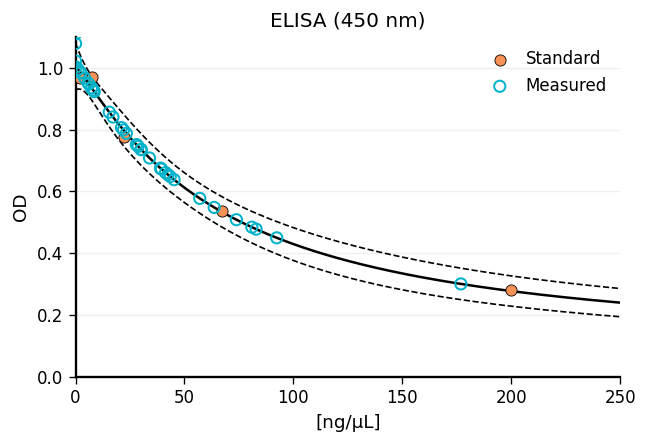

In [6]:
AuxiliarFunctions.plot_elisa_curve(
    standards=standards,
    samples=samples,
    params=params,
    cov=cov,
    x_min=0.0,
    x_max=250.0,
    output_file="elisa_curve.png",
)